# Import

In [1]:
import numpy as np
import cortex
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error

# Visualize correlations and stacking weights

In [11]:
# mask = cortex.db.get_mask('MNI','atlas_152_sub1','thin')
# vols = {}
neuromod_subjects = ['01', '02', '03', '04', '05', '06']
S_subjects = {}
r2s = {'individual_r2s':{}, 'stacked_r2s':{}}
for sub in neuromod_subjects:
    corrs_path = 'stacking_results/stacking_results_{}_rep_2_with_speaker_elmo.npy'.format(sub)
    loaded = np.load(corrs_path, allow_pickle=True).item()
    elmo_corrs = loaded['all_corrs_stored']['corrs'][0]
#     speaker_corrs = loaded['all_corrs_stored']['corrs'][1]
#     stacked_corrs = loaded['all_corrs_stored']['stacked_corrs']
#     S_subjects[sub] = loaded['S_average']
    vols['elmo, sub'+sub] = cortex.Volume(elmo_corrs, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
#     vols['speaker, sub'+sub] = cortex.Volume(speaker_corrs, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
#     vols['stacked, sub'+sub] = cortex.Volume(stacked_corrs, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
#     vols['S_elmo, sub'+sub] = cortex.Volume(S_subjects[sub][:,0], 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
#     vols['S_speaker, sub'+sub] = cortex.Volume(S_subjects[sub][:,1], 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
#     r2s['individual_r2s'][sub] = loaded['all_r2s_stored']['r2s']
#     r2s['stacked_r2s'][sub] = loaded['all_r2s_stored']['stacked_r2s']

In [12]:
cortex.webshow(vols,open_browser=False)

Started server on port 30363


<WebApp(Thread-6, started 13021184000)>

Stopping server
Stopping server


In [ ]:
# mean_stacked, mean_elmo, mean_speaker = None, None, None
# for sub in neuromod_subjects:
#     if mean_stacked is not None:
#         mean_stacked += stacked_corrs
#     else:
#         mean_stacked = stacked_corrs
        
#     if mean_elmo is not None:
#         mean_elmo += S_subjects[sub][:,0]
#     else:
#         mean_elmo = S_subjects[sub][:,0]
        
#     if mean_speaker is not None:
#         mean_speaker += S_subjects[sub][:,1]
#     else:
#         mean_speaker = S_subjects[sub][:,1]
# mean_stacked /= 6
# mean_elmo /= 6
# mean_speaker /= 6
# vols['S_elmo'] = cortex.Volume(mean_elmo, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
# vols['S_speaker'] = cortex.Volume(mean_speaker, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
# vols['stacked'] = cortex.Volume(mean_stacked, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')

# Comparing r-squared values from individual predictors vs stacking

In [7]:
for sub, S in S_subjects.items():
    print("sub{}, S={}".format(sub, S.mean(0)))

sub01, S=[0.55328924 0.44671076]
sub02, S=[0.548425 0.451575]
sub03, S=[0.54598376 0.45401624]
sub04, S=[0.43212979 0.56787021]
sub05, S=[0.50232898 0.49767102]
sub06, S=[0.4609536 0.5390464]


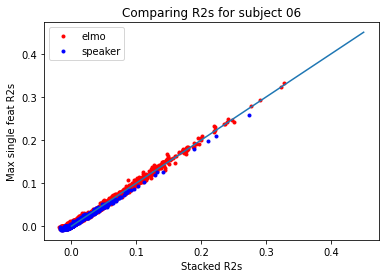

In [54]:
# compare prediction error using stacking method and the best feature
colordict = {0: ('elmo', 'red'), 1: ('speaker', 'blue')}
for sub in neuromod_subjects:
    for i, (feat_name, color) in colordict.items():
        feat_indices = np.where(np.argmax(r2s['individual_r2s'][sub], 0) == i)
        plt.plot(r2s['stacked_r2s'][sub][feat_indices], np.max(r2s['individual_r2s'][sub],axis=0)[feat_indices],'.', c=color, label=feat_name)
    plt.legend()
    plt.title('Comparing R2s for subject {}'.format(sub))
    plt.xlabel('Stacked R2s')
    plt.ylabel('Max single feat R2s')
    plt.plot([0,0.45],[0,0.45])

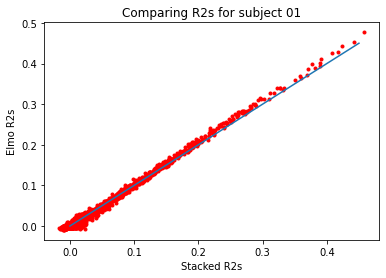

In [37]:
for sub in neuromod_subjects:
    plt.plot(r2s['stacked_r2s'][sub], r2s['individual_r2s'][sub][0],'.',c='red')
    plt.title('Comparing R2s for subject {}'.format(sub))
    plt.xlabel('Stacked R2s')
    plt.ylabel('Elmo R2s')
    plt.plot([0,0.45],[0,0.45])

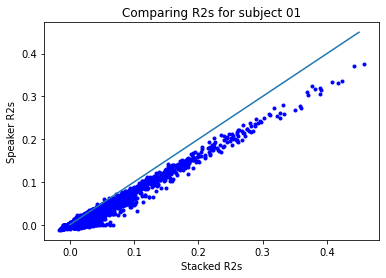

Stopping server


In [38]:
for sub in neuromod_subjects:
    plt.plot(r2s['stacked_r2s'][sub], r2s['individual_r2s'][sub][1],'.',c='blue')
    plt.title('Comparing R2s for subject {}'.format(sub))
    plt.xlabel('Stacked R2s')
    plt.ylabel('Speaker R2s')
    plt.plot([0,0.45],[0,0.45])

In [27]:
for sub in neuromod_subjects:
    print("Subject: {}".format(sub))
    print("---> Num Elmo Max R2s: ", r2s['individual_r2s'][sub].shape[1] - np.argmax(r2s['individual_r2s'][sub], 0).sum())
    print("---> Num Speaker Max R2s: ", np.argmax(r2s['individual_r2s'][sub], 0).sum())

Num Elmo Max R2s:  37879
Num Speaker Max R2s:  29578


# Visualize ELMo vs (ELMo - Speaker) performance

In [2]:
def corr(X,Y):
    return np.mean(zscore(X)*zscore(Y),0)

In [50]:
mask = cortex.db.get_mask('MNI','atlas_152_sub1','thin')
vols = {}
neuromod_subjects = ['01', '02', '03', '04', '05', '06']
for sub in neuromod_subjects:
    elmo_corrs_path = 'speaker_elmo_wordrate_results/elmo/predict_{}_rep_2_with_elmo_layer_1_len_25.npy'.format(sub)
#     elmo_corrs = np.load(elmo_corrs_path, allow_pickle=True).item()['corrs_t']
#     vols['elmo, sub'+sub] = cortex.Volume(elmo_corrs, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
    elmo_preds = np.load(elmo_corrs_path, allow_pickle=True).item()['preds_t']
    elmo_test = np.load(elmo_corrs_path, allow_pickle=True).item()['test_t']
    elmo_corrs_from_preds = corr(elmo_preds, elmo_test)
    vols['elmo, sub'+sub] = cortex.Volume(elmo_corrs_from_preds, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
    
    
    elmo_regressoutspeaker_corrs_path = 'speaker_elmo_wordrate_results/elmo_without_speaker/predict_{}_rep_2_with_elmo_layer_1_len_25_regress_out_speaker.npy'.format(sub)
#     elmo_regressoutspeaker_corrs = np.load(elmo_regressoutspeaker_corrs_path, allow_pickle=True).item()['corrs_t']
#     vols['elmo_regress_out_speaker, sub'+sub] = cortex.Volume(elmo_regressoutspeaker_corrs, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
    elmo_regressoutspeaker_preds = np.load(elmo_regressoutspeaker_corrs_path, allow_pickle=True).item()['preds_t']
    elmo_regressoutspeaker_test = np.load(elmo_regressoutspeaker_corrs_path, allow_pickle=True).item()['test_t']
    elmo_regressoutspeaker_corrs_from_preds = corr(elmo_regressoutspeaker_preds, elmo_regressoutspeaker_test)
    vols['elmo_regress_out_speaker, sub'+sub] = cortex.Volume(elmo_regressoutspeaker_corrs_from_preds, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')

In [51]:
cortex.webshow(vols,open_browser=False)

Started server on port 18250


<WebApp(Thread-7, started 13021184000)>

# Performance of (Speaker -> ELMo) and (ELMo -> Speaker) Models

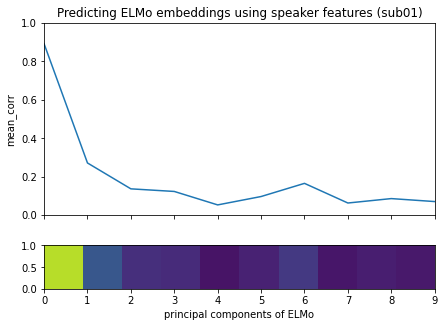

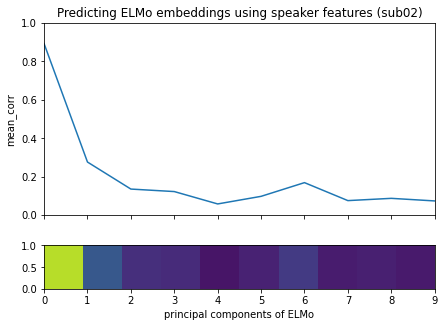

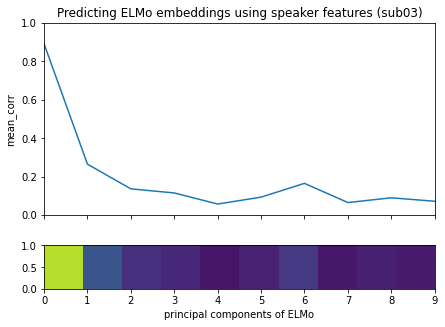

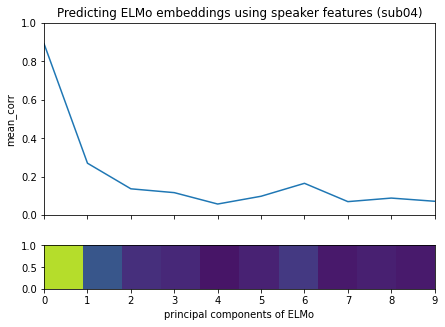

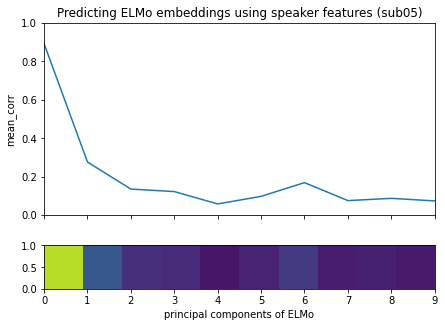

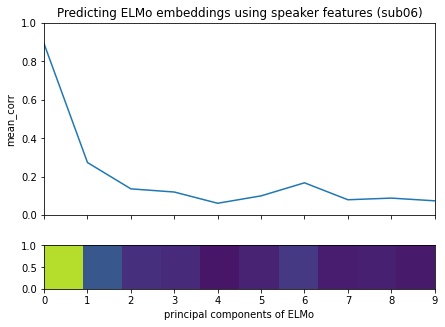

In [123]:
for sub in neuromod_subjects:
    all_results_path = 'speaker_elmo_wordrate_results/elmo_speaker_regression_performance/predict_{}_rep_2_with_elmo_layer_1_len_25_regress_out_speaker.npy'.format(sub)
    all_results = np.load(all_results_path, allow_pickle=True).item()

    # Speaker -> ELMo
    speaker2elmo_preds = all_results['regressfeat2predictfeat_preds_t']
    elmo_test = all_results['predictfeat_test_t']
    speaker2elmo_corrs = corr(speaker2elmo_preds, elmo_test)

    # ELMo -> Speaker
#     elmo2speaker_preds = all_results['predictfeat2regressfeat_preds_t']
#     speaker_test = all_results['regressfeat_test_t']
#     elmo2speaker_corrs = corr(elmo2speaker_preds, speaker_test)

    # Plot Speaker -> ELMo
    xs = [i for i in range(10)]
    mean_corrs = [speaker2elmo_corrs[[j for j in range(i,60,10)]].mean() for i in range(10)]

    fig, (ax0, ax1) = plt.subplots(
        nrows=2, gridspec_kw={'height_ratios':[7, 2],}, sharex=True, figsize=(7,5))
    ax0.set_title("Predicting ELMo embeddings using speaker features (sub{})".format(sub))
    ax0.plot(xs, mean_corrs)
    ax0.set_ylim([0.0,1.0])
    ax0.set_ylabel("mean_corr")
    ax1.set_xlabel("principal components of ELMo")
    ax1.imshow(np.atleast_2d(mean_corrs), vmin=0.0, vmax=1.0,
                  extent=(0, 9, 0, 1))
    plt.show()

# Visualize wordsPerTR performance

In [143]:
vols = {}
for sub in neuromod_subjects:
    wordsPerTR_results_path = 'speaker_elmo_wordrate_results/words_per_TR/predict_{}_rep_2_with_words_per_TR.npy'.format(sub)
    wordsPerTR_results = np.load(wordsPerTR_results_path, allow_pickle=True).item()
    wordsPerTR_corrs = corr(wordsPerTR_results['preds_t'], wordsPerTR_results['test_t'])
    vols['wordsPerTR, sub'+sub] = cortex.Volume(wordsPerTR_corrs, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')

In [144]:
cortex.webshow(vols,open_browser=False)

Started server on port 10163


<WebApp(Thread-13, started 13037973504)>

# Visualize Speaker vs (Speaker - wordsPerTR) performance

In [3]:
mask = cortex.db.get_mask('MNI','atlas_152_sub1','thin')
vols = {}
neuromod_subjects = ['01', '02', '03', '04', '05', '06']
for sub in neuromod_subjects:
    stacking_results_path = 'stacking_results/stacking_results_{}_rep_2_with_speaker_elmo.npy'.format(sub)
    loaded = np.load(stacking_results_path, allow_pickle=True).item()
    speaker_corrs = loaded['all_corrs_stored']['corrs'][1]
    vols['speaker, sub'+sub] = cortex.Volume(speaker_corrs, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')
    
    speaker_without_wordsPerTR_results_path = 'speaker_elmo_wordrate_results/speaker_without_words_per_TR/predict_{}_rep_2_with_speaker.npy'.format(sub)
    loaded = np.load(speaker_without_wordsPerTR_results_path, allow_pickle=True).item()
    speaker_without_wordsPerTR_preds = loaded['preds_t']
    speaker_without_wordsPerTR_test = loaded['test_t']
    speaker_without_wordsPerTR_corrs = corr(speaker_without_wordsPerTR_preds, speaker_without_wordsPerTR_test)
    vols['speaker_without_wordsPerTR, sub'+sub] = cortex.Volume(speaker_without_wordsPerTR_corrs, 'MNI', 'atlas_152_sub1', mask=mask, vmin=0.05, vmax=0.2, cmap='viridis')

In [4]:
cortex.webshow(vols,open_browser=False)

Started server on port 28532


<WebApp(Thread-4, started 13143785472)>

# Performance of (wordsPerTR -> Speaker) and (Speaker -> wordsPerTR) Models

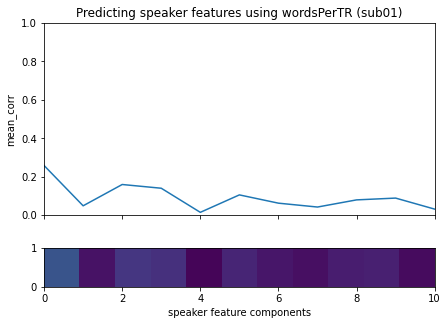

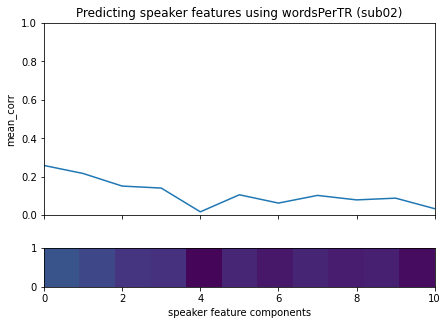

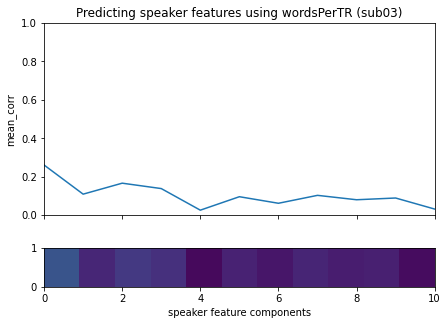

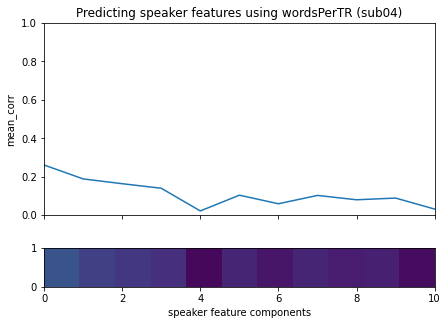

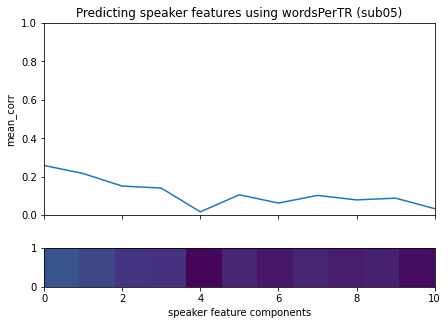

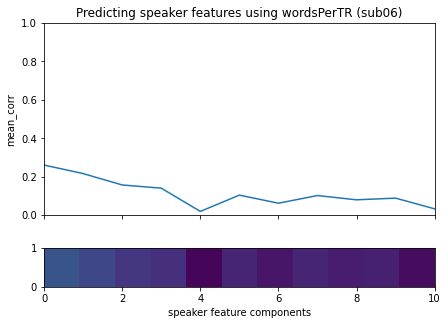

Stopping server


In [5]:
for sub in neuromod_subjects:
    all_results_path = 'speaker_elmo_wordrate_results/speaker_without_words_per_TR/predict_{}_rep_2_with_speaker.npy'.format(sub)
    all_results = np.load(all_results_path, allow_pickle=True).item()

    # wordsPerTR -> speaker
    wordsPerTR2speaker_preds = all_results['regressfeat2predictfeat_preds_t']
    speaker_test = all_results['predictfeat_test_t']
    wordsPerTR2speaker_corrs = corr(wordsPerTR2speaker_preds, speaker_test)

    # Plot wordsPerTR -> speaker
    xs = [i for i in range(11)]
    mean_corrs = [wordsPerTR2speaker_corrs[[j for j in range(i,66,11)]].mean() for i in range(11)]

    fig, (ax0, ax1) = plt.subplots(
        nrows=2, gridspec_kw={'height_ratios':[7, 2],}, sharex=True, figsize=(7,5))
    ax0.set_title("Predicting speaker features using wordsPerTR (sub{})".format(sub))
    ax0.plot(xs, mean_corrs)
    ax0.set_ylim([0.0,1.0])
    ax0.set_ylabel("mean_corr")
    ax1.set_xlabel("speaker feature components")
    ax1.imshow(np.atleast_2d(mean_corrs), vmin=0.0, vmax=1.0,
                  extent=(0, 10, 0, 1))
    plt.show()